In [34]:

from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [35]:
(x_train, y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype("float32")/255
y_train=to_categorical(y_train, num_classes=10)
x_test=x_test.astype("float32")/255
y_test=to_categorical(y_test, num_classes=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout

In [42]:
model=Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10,activation='softmax')   
])

In [43]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,845,962 (10.86 MB)

 Trainable params: 2,845,962 (10.86 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [45]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=40)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.4027 - loss: 0.2545 - val_accuracy: 0.5408 - val_loss: 0.2055
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.5454 - loss: 0.2055 - val_accuracy: 0.6110 - val_loss: 0.1789
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.6045 - loss: 0.1836 - val_accuracy: 0.6341 - val_loss: 0.1723
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.6449 - loss: 0.1693 - val_accuracy: 0.6622 - val_loss: 0.1625
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.6754 - loss: 0.1566 - val_accuracy: 0.6846 - val_loss: 0.1518
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.7007 - loss: 0.1462 - val_accuracy: 0.6720 - val_loss: 0.1563
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.7211 - loss: 0.1375 - val_accuracy: 0.6999 - val_loss: 0.1477
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.7440 -

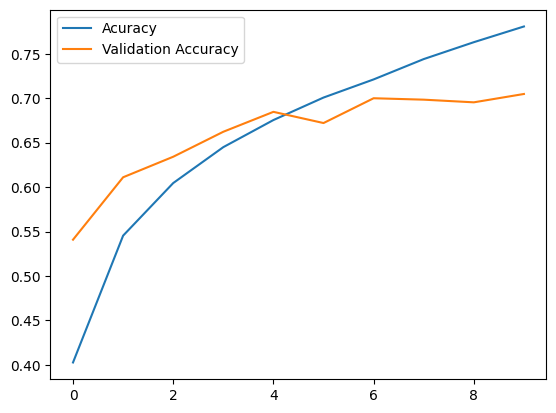

In [46]:
import matplotlib.pyplot as plt
accuracy=history.history["accuracy"]
validation_accuracy=history.history["val_accuracy"]
plt.plot(accuracy, label="Acuracy")
plt.plot(validation_accuracy, label="Validation Accuracy")
plt.legend()
plt.show()


In [47]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6960 - loss: 0.1552
0.15518967807292938
0.6959999799728394


In [48]:
model.save("cifar10_model.h5")